# Задание №6. Пружинные маятники.

## Импорт модулей

In [48]:
from typing import Callable, Tuple, List
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

## 2 маятника

### Метод Рунге-Кутта

In [4]:
def runge_kutta(fs: Tuple[Callable], n: int, h: float, t: float, x: float, y: float, u: float, v: float) -> Tuple[float, float, float, float, float]:
    """ Численный метод решения систем обыкновенных дифференциальных уравнений методом Рунге-Кутта
    
        :param fs: кортеж из первого и второго уравнений
        :type fs: Tuple[Callable]
        :param n: количество итераций (дней)
        :type n: int
        :param h: шаг
        :type h: float
        :param t: начальная точка `t`
        :type t: float
        :param x: начальная точка `x`
        :type x: float
        :param y: начальная точка `y`
        :type y: float
        :param u: начальная точка `u`
        :type u: float
        :param v: начальная точка `v`
        :type v: float
        
        :return: решение ДУ
        :rtype: Tuple[float, float, float, float, float]
    """
    def k(k1, k2, k3, k4):
            return (k1 + 2*k2 + 2*k3 + k4)/6
    for _ in range(n):
        k11, k21, k31, k41 = map(lambda f: h * f(t, x, y, u, v), fs)
        k12, k22, k32, k42 = map(lambda f: h * f(t + h/2, x + k11/2, y + k21/2, u + k31/2, v + k41/2), fs)
        k13, k23, k33, k43 = map(lambda f: h * f(t + h/2, x + k12/2, y + k22/2, u + k32/2, v + k42/2), fs)
        k14, k24, k34, k44 = map(lambda f: h * f(t + h,   x + k13,   y + k23,   u + k33,   v + k43), fs)
        k1, k2, k3, k4 = k(k11, k12, k13, k14), k(k21, k22, k23, k24), k(k31, k32, k33, k34), k(k41, k42, k43, k44)
        t, x, y, u, v = t + h, x + k1, y + k2, u + k3, v + k4
    return t, x, y, u, v

In [5]:
def g1(t, x1, x2, y1, y2, *, kg=0.8, k=1):
    return -kg*y1+k*(y2-y1)

In [6]:
def g2(t, x1, x2, y1, y2, *, kg=0.8, k=1):
    return -kg*y2+k*(y1-y2)

In [7]:
def f1(t, x1, x2, y1, y2, *, kg=0.8, k=1):
    return x1

In [8]:
def f2(t, x1, x2, y1, y2, *, kg=0.8, k=1):
    return x2

### Ответ для определённого момента времени

In [9]:
runge_kutta((g1, g2, f1, f2), 1103, 0.01, 0, 0, 0, 0, 0.5)

(11.02999999999981,
 -0.06474531918151923,
 0.2555362480184984,
 -0.4570643726054702,
 0.004849239245314851)

## Общий случай

### Генерируем данные

In [176]:
n = 2
kg = 0.8
k = 1

In [177]:
def generate_data(n: int, kg: float, k: float) -> Tuple[List[Callable], List[float]]:
    """ Создаёт систему ДУ, которая соответствует модели с пружинными маятниками
        
        :param n: количество маятников
        :type n: int
        :param kg: коэффициент пружинности для первого и последнего маятника
        :type kg: float
        :param k: коэффициент пружинности между маятниками
           
        :return: сгенерированная система ДУ, которая соответствует модели с пружинными маятниками
        :rtype: Tuple[List[Callable], List[float]]
    """
    xs = [0 for _ in range(2*n)]  # начальные значения переменных
    ys = [0 for _ in range(2*n)]  # уравнения в системе ДУ
    ys[0] = lambda xs, kg=kg, k=k: -kg*xs[n] + k*(xs[n+1]-xs[n])  # уравнение для 1-го маятника
    for i in range(1, n-1):
        ys[i] = lambda xs, kg=kg, k=k, i=i: k*(xs[n+i+1] - xs[n+i]) - k*(xs[n+i]-xs[n+i-1])  # уравнения для внутренних маятников
    ys[n-1] = lambda xs, kg=kg, k=k: -kg*xs[2*n-1] + k*(xs[2*n-2]-xs[2*n-1])  # уравнение для последнего маятника
    for i in range(n, 2*n):
        ys[i] = lambda xs, kg=kg, k=k, i=i: xs[i-n]
    return ys, xs

In [178]:
ys, xs = generate_data(n, kg, k)

In [186]:
xs = [0, 0, 0, 0.5]

### Метод Рунге-Кутта в общем случае

In [187]:
def n_runge_kutta(ys: List[Callable], xs: List[float], ni: int, *, h=0.01) -> List[float]:
    """ Численный метод решения систем обыкновенных дифференциальных уравнений методом Рунге-Кутта в общем случае
    
        :param  ys: список функций (ДУ)
        :type ys: List[Callable]
        :param xs: список начальных значений для переменных
        :type xs: List[float]
        :param ni: количество итераций
        :type ni: int
        :param h: шаг
        :type h: float
        
        :return: решение ДУ
        :rtype: List[float]
    """
    n = len(ys)
    for _ in range(ni):
        k1 = [h * f(xs) for f in ys]
        xs2 = [xs[i] + k1[i]/2 for i in range(n)]
        k2 = [h * f(xs2) for f in ys]
        xs3 = [xs[i] + k2[i]/2 for i in range(n)]
        k3 = [h * f(xs3) for f in ys]
        xs4 = [xs[i] + k3[i] for i in range(n)]
        k4 = [h * f(xs4) for f in ys]
        kit = [(k1[i] + 2*k2[i] + 2*k3[i] + k4[i])/6 for i in range(n)]
        xs = [xs[i] + kit[i] for i in range(n)]
    return xs

In [188]:
n_runge_kutta(ys, xs, 1165)

[0.43896178089135574,
 -0.0637846207381812,
 -0.33589469603391064,
 0.06376857982640921]

### Строим графики

In [182]:
def plot_points(ys: List[Callable], xs: List[float], n: int, ni: int, *, h=0.01):
    """ Функция, которая считает точки для заданной системы ДУ и начального условия
    
        :param ys: список функций (ДУ)
        :type ys: List[Callable]
        :param xs: список начальных значений для переменных
        :type xs: List[float]
        :param n: количество маятников
        :type n: int
        :param ni: количество итераций
        :type ni: int
        :param h: шаг
        :type h: float
    """
    points = [[] for _ in range(n)]
    for j in range(ni):
        res = n_runge_kutta(ys, xs, j)
        for i in range(n):
            points[i].append(res[-i])
    return points

In [183]:
points = plot_points(ys, xs, n, 5000)

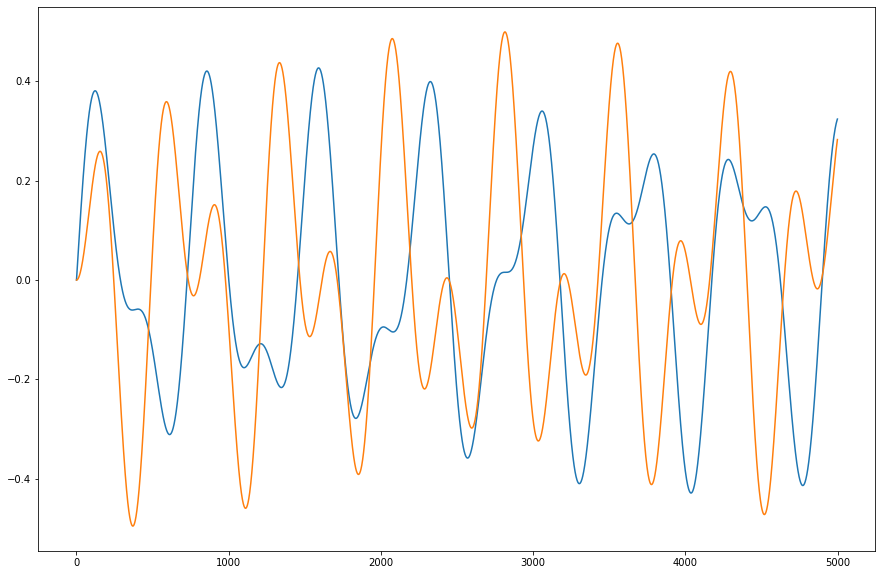

In [184]:
plt.rcParams["figure.figsize"] = (15,10)
for i in range(n-1, -1, -1):
    plt.plot(points[i])

### Случай с 3 маятниками

In [168]:
n = 3
kg = 0.5
k = 1

In [169]:
ys, xs = generate_data(n, kg, k)

In [170]:
xs = [0, 0.5, 1, 0, 0, 0]

In [172]:
points = plot_points(ys, xs, n, 5000)

(-1.5, 1.5)

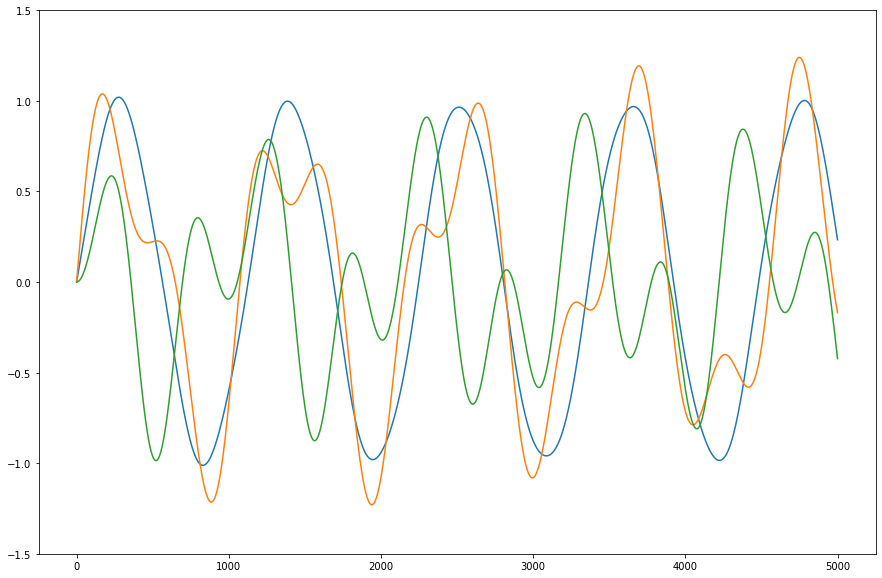

In [174]:
plt.rcParams["figure.figsize"] = (15,10)
for i in range(n-1, -1, -1):
    plt.plot(points[i])
ax = plt.gca()
ax.set_ylim([-1.5, 1.5])

### Случай с 4 маятниками

In [193]:
n = 4
kg = 0.5
k = 1

In [194]:
ys, xs = generate_data(n, kg, k)

In [201]:
xs = [0, 0, 0, 0, 0, 0.5, 1.5, 2]

In [204]:
points = plot_points(ys, xs, n, 5000)

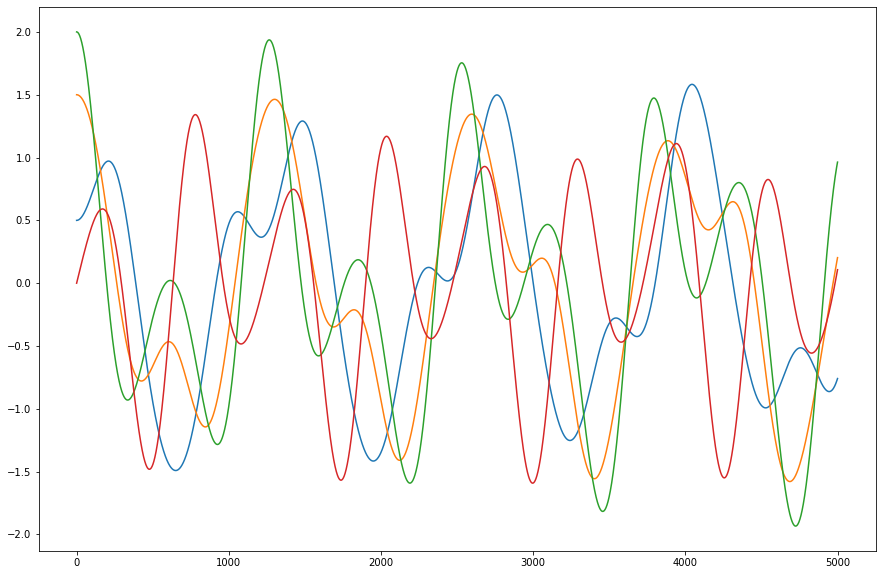

In [205]:
plt.rcParams["figure.figsize"] = (15,10)
for i in range(n-1, -1, -1):
    plt.plot(points[i])